# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron
### Module Coordinator: Tanish Lad

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

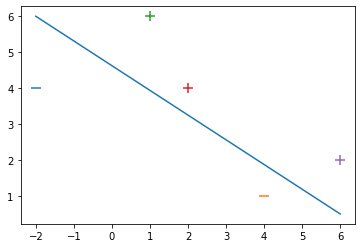

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

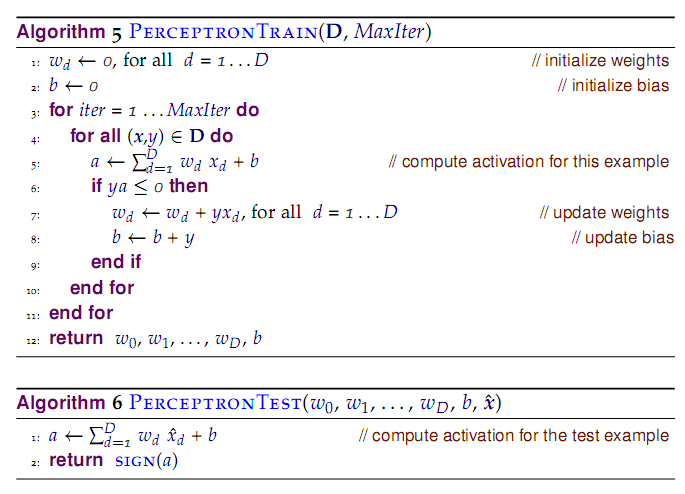

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

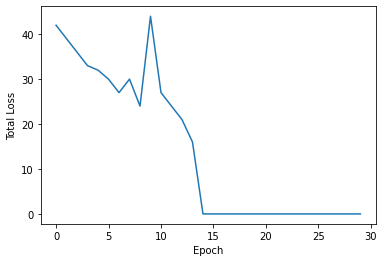

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

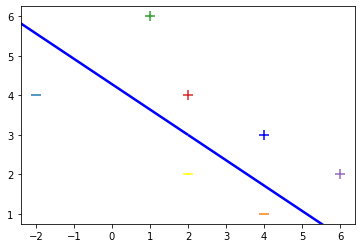

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


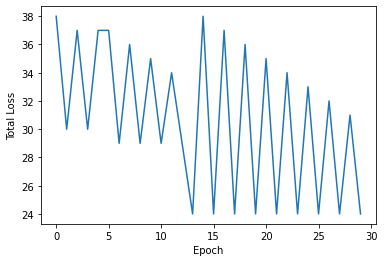

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

# My Answers:



## Answer 1:

We use the banknote dataset from UCI repository (link given below)

In [ ]:
from urllib.request import urlopen
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
dataset[0:5]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699,  0.     ],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ,  0.     ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645,  0.     ],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ,  0.     ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ,  0.     ]])

Now, we use the Standard Scaler to normalize the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
y = dataset[:, -1]
X_scaled = StandardScaler().fit_transform(X = dataset[:, :-1])

In [ ]:
X_scaled

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

Now, we append the bias term -1

In [ ]:
X_appended = np.hstack((X_scaled, -np.expand_dims(np.ones(dataset.shape[0]), axis = 1)))

In [ ]:
X_appended

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135, -1.        ],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744, -1.        ],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317, -1.        ],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418, -1.        ],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848, -1.        ],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 , -1.        ]])

We just try visualizing the data after applying PCA...

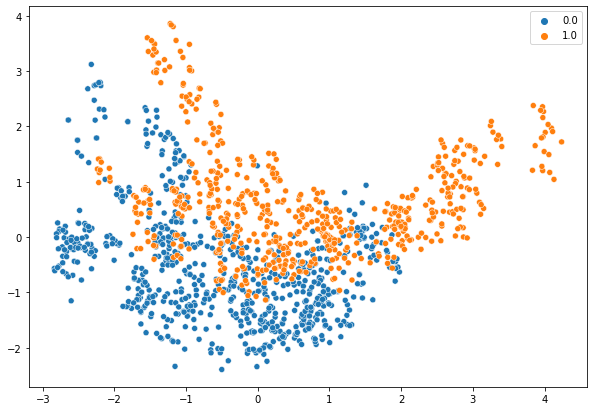

In [ ]:
# just visualizing

import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X_appended[:, :-1])
plt.figure(figsize = (10, 7))
sns.scatterplot(x = pca_data.T[0], y = pca_data.T[1], hue = y)

There is some distinction between the classes after dimensionality reduction. 
Let us now train the perceptron and get the weights. 
Before that, we make sure to replace the target values of 0 with -1.

In [ ]:
y_updated = np.where(y == 0., -1., 1)
weights = perceptron_algo(X_appended, y_updated)
weights

array([-8.75755648, -9.7951406 , -8.41030145,  0.01944531,  2.        ])

Hence, these weights form a hyperplane, which may or may not be linearly seperable.

Let us take a look at the error plot...

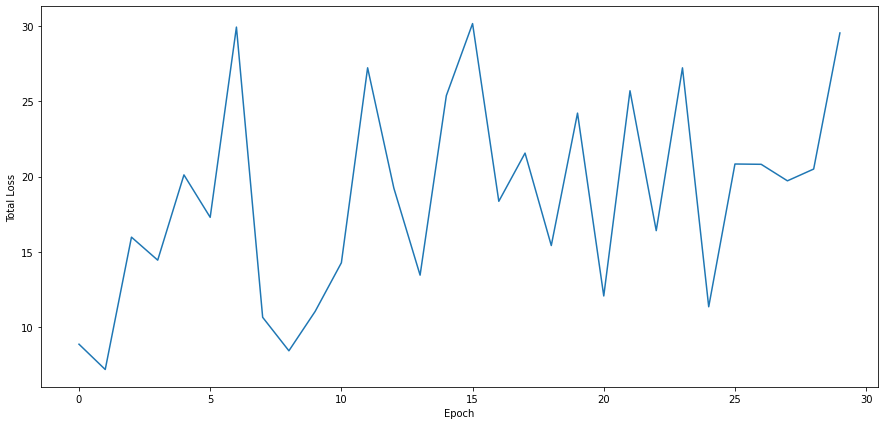

In [ ]:
# the error plot
plt.figure(figsize = (15, 7))
perceptron_algo_plot(X_appended, y_updated)
plt.show()

The loss is not completely zero. Moreover, it is oscillatory with each epoch, probably shifting back and fro because of trying to fit a linear classifier on a linearly non-seperable model. Let us check the accuracy of the model.

In [ ]:
# number of correctly identified samples
np.sum((np.sum(weights*X_appended, axis = 1)*y_updated)>0)

1348

Hence, out of 1372 samples, 1348 are classified correctly, hence an accuracy of 98.25%. This shows that the model is ***almost linearly seperable***.

## Answer 2:

We will first define another set of functions that take learning rate as a parameter.

In [ ]:
def perceptron_algo(X, Y, eta = 1):
    w = np.zeros(len(X[0]))
    # eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
# we define the function to return the errors, instead of plot

def perceptron_algo_errors(X, Y, eta = 1):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    # eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    return w, errors

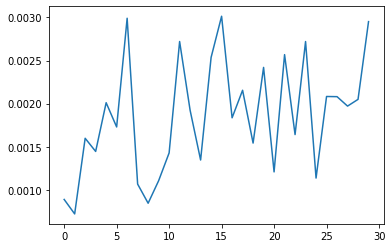

In [ ]:
weights, errors = perceptron_algo_errors(X_appended, y_updated, eta = 0.0001)
plt.plot(errors)

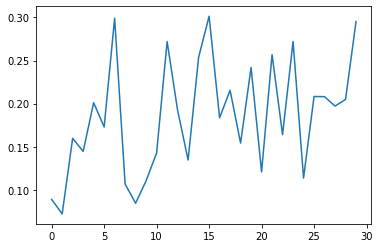

In [ ]:
weights, errors = perceptron_algo_errors(X_appended, y_updated, eta = 0.01)
plt.plot(errors)

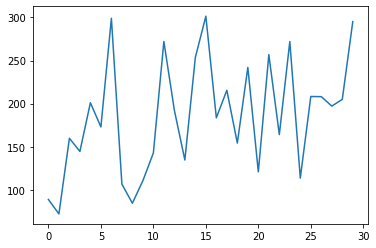

In [ ]:
weights, errors = perceptron_algo_errors(X_appended, y_updated, eta = 10)
plt.plot(errors)

Clearly, the loss increases with the learning rate parameter, but the plot still stays the same in shape. This is because our loss is dependent on our learning rate alpha.

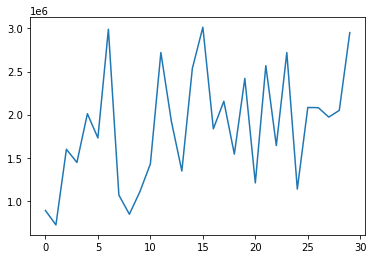

In [ ]:
weights, errors = perceptron_algo_errors(X_appended, y_updated, eta = 100000)
plt.plot(errors)

It still converges to a minimum with very small oscillations. But it is not adviced, as it may converge to a local and not global minima in the parameter space (false minimum).

## Answer 3:



Firstly, we take points that form concentric circles with each class.

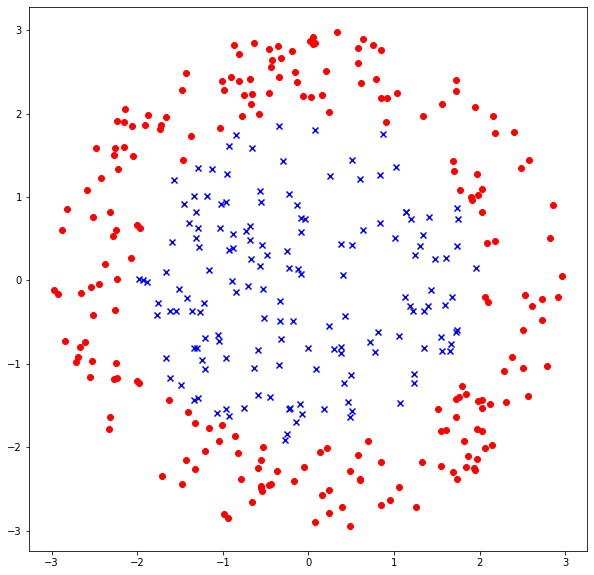

In [ ]:
plt.figure(figsize = (10, 10))
points_1 = []
points_2 = []
r = 2
for i in range(1000):

  a = np.random.random()*9 - 3
  b = np.random.random()*9 - 3
  
  if a**2 + b**2 < 9 and a**2 + b**2 > 4:
   points_1.append([a, b])
  elif a**2 + b**2 < 4:
    points_2.append([a, b])

point_array_1 = np.asarray(points_1)
point_array_2 = np.asarray(points_2)
plt.scatter(point_array_1.T[0], point_array_1.T[1], marker = 'o', color = 'red', label = '1')
plt.scatter(point_array_2.T[0], point_array_2.T[1], marker = 'x', color = 'blue', label = '0')

plt.show()

In [ ]:
points_1 = np.hstack((StandardScaler().fit_transform(point_array_1), -np.expand_dims(np.ones(point_array_1.shape[0]), axis = 1)))
points_2 = np.hstack((StandardScaler().fit_transform(point_array_2), np.expand_dims(np.ones(point_array_2.shape[0]), axis = 1)))

In [ ]:
toy_dataset = np.vstack((points_1, points_2))

In [ ]:
y_updated_new = toy_dataset[:, -1]
X_new = toy_dataset[:, :-1]
X_new = np.hstack((X_new, -np.expand_dims(np.ones(X_new.shape[0]), axis = 1)))

Now, if we plot the errors, it is oscillating as expected, because the dataset is not seperable.

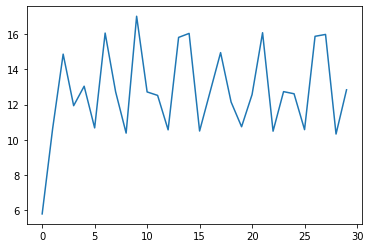

In [ ]:
plt.plot(perceptron_algo_errors(X_new, y_updated_new)[-1])

Now, if we check the accuracy:

In [ ]:
print(f"Accuracy is around {np.sum((np.sum(perceptron_algo_errors(X_new, y_updated_new)[0]*X_new, axis = 1)*y_updated_new)>0)/X_new.shape[0]*100}%")

Accuracy is around 42.69972451790633%


Clearly, as expected, the 'circular' data is not linearly seperable (the errors were oscillating and the accuracy was very bad), and this verifies the fact that perceptron algorithm works well only with linearly seperable data.